In [31]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [32]:
# use our cdist function developed in the previous notebook
def cdist(I, J):
    i, j = np.mgrid[:I.shape[0],:J.shape[0]]
    return np.sqrt(np.sum((I[i] - J[j])**2,axis=2))

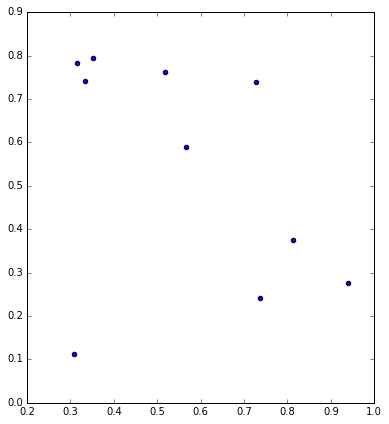

In [33]:
# create some randomly-located points
n_points=10
I, J = np.random.uniform(size=(2,n_points))
IJ = np.vstack((I,J)).T

plt.figure(figsize=(7,7))
plt.gca().set_aspect('equal')
plt.scatter(I,J)

In [34]:
# compute the pairwise distances between all the points
D = cdist(IJ,IJ)
D

array([[ 0.        ,  0.39437384,  0.27931127,  0.62972932,  0.76449172,
         0.60485172,  0.1869267 ,  0.05434219,  0.64283698,  0.04389449],
       [ 0.39437384,  0.        ,  0.22035687,  0.75432083,  0.50987028,
         0.37569891,  0.2099102 ,  0.37955584,  0.49856804,  0.41471945],
       [ 0.27931127,  0.22035687,  0.        ,  0.54194054,  0.48644817,
         0.32697313,  0.18047457,  0.29650682,  0.38680868,  0.31728747],
       [ 0.62972932,  0.75432083,  0.54194054,  0.        ,  0.65168573,
         0.56853635,  0.68351739,  0.68169663,  0.44700451,  0.66921007],
       [ 0.76449172,  0.50987028,  0.48644817,  0.65168573,  0.        ,
         0.15964354,  0.64331126,  0.78262554,  0.20574088,  0.80353598],
       [ 0.60485172,  0.37569891,  0.32697313,  0.56853635,  0.15964354,
         0.        ,  0.48777285,  0.62334656,  0.15333109,  0.64393096],
       [ 0.1869267 ,  0.2099102 ,  0.18047457,  0.68351739,  0.64331126,
         0.48777285,  0.        ,  0.16985783

In [35]:
# if we sort along one axis we get the distance to the nearest neighbors
# of each point
# note that the distances in the first column are zero because each point
# is closest to itself
nn_d = np.sort(D,axis=1)
nn_d

array([[ 0.        ,  0.04389449,  0.05434219,  0.1869267 ,  0.27931127,
         0.39437384,  0.60485172,  0.62972932,  0.64283698,  0.76449172],
       [ 0.        ,  0.2099102 ,  0.22035687,  0.37569891,  0.37955584,
         0.39437384,  0.41471945,  0.49856804,  0.50987028,  0.75432083],
       [ 0.        ,  0.18047457,  0.22035687,  0.27931127,  0.29650682,
         0.31728747,  0.32697313,  0.38680868,  0.48644817,  0.54194054],
       [ 0.        ,  0.44700451,  0.54194054,  0.56853635,  0.62972932,
         0.65168573,  0.66921007,  0.68169663,  0.68351739,  0.75432083],
       [ 0.        ,  0.15964354,  0.20574088,  0.48644817,  0.50987028,
         0.64331126,  0.65168573,  0.76449172,  0.78262554,  0.80353598],
       [ 0.        ,  0.15333109,  0.15964354,  0.32697313,  0.37569891,
         0.48777285,  0.56853635,  0.60485172,  0.62334656,  0.64393096],
       [ 0.        ,  0.16985783,  0.18047457,  0.1869267 ,  0.2048263 ,
         0.2099102 ,  0.48777285,  0.56518637

In [36]:
# to get the closest k distances, we just truncate this array along the second axis
nn_d[:,:3]

array([[ 0.        ,  0.04389449,  0.05434219],
       [ 0.        ,  0.2099102 ,  0.22035687],
       [ 0.        ,  0.18047457,  0.22035687],
       [ 0.        ,  0.44700451,  0.54194054],
       [ 0.        ,  0.15964354,  0.20574088],
       [ 0.        ,  0.15333109,  0.15964354],
       [ 0.        ,  0.16985783,  0.18047457],
       [ 0.        ,  0.03842135,  0.05434219],
       [ 0.        ,  0.15333109,  0.20574088],
       [ 0.        ,  0.03842135,  0.04389449]])

In [37]:
# argsort of the distance array tells us *which* points are nearest.
# note that the first column is sequential because each point is closest to itself
nn_ix = np.argsort(D,axis=1)
nn_ix

array([[0, 9, 7, 6, 2, 1, 5, 3, 8, 4],
       [1, 6, 2, 5, 7, 0, 9, 8, 4, 3],
       [2, 6, 1, 0, 7, 9, 5, 8, 4, 3],
       [3, 8, 2, 5, 0, 4, 9, 7, 6, 1],
       [4, 5, 8, 2, 1, 6, 3, 0, 7, 9],
       [5, 8, 4, 2, 1, 6, 3, 0, 7, 9],
       [6, 7, 2, 0, 9, 1, 5, 8, 4, 3],
       [7, 9, 0, 6, 2, 1, 5, 8, 3, 4],
       [8, 5, 4, 2, 3, 1, 6, 0, 7, 9],
       [9, 7, 0, 6, 2, 1, 5, 3, 8, 4]])

In [38]:
# and we can subset it by whatever k we want
k=3
knn_ix = nn_ix[:,:k]
knn_ix

array([[0, 9, 7],
       [1, 6, 2],
       [2, 6, 1],
       [3, 8, 2],
       [4, 5, 8],
       [5, 8, 4],
       [6, 7, 2],
       [7, 9, 0],
       [8, 5, 4],
       [9, 7, 0]])

In [39]:
# to get the distances that correspond to the indices, we need
# to use a fairly tricky indexing scheme.

In [40]:
# first create a matrix the same size as knn_ix of row numbers
row, _ = np.mgrid[:IJ.shape[0],:k]
row

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4],
       [5, 5, 5],
       [6, 6, 6],
       [7, 7, 7],
       [8, 8, 8],
       [9, 9, 9]])

In [41]:
# now we can use the row matrix as the row index into D,
# and the knn_ix matrix as the column index
knn_dist = D[row,knn_ix]
knn_dist

array([[ 0.        ,  0.04389449,  0.05434219],
       [ 0.        ,  0.2099102 ,  0.22035687],
       [ 0.        ,  0.18047457,  0.22035687],
       [ 0.        ,  0.44700451,  0.54194054],
       [ 0.        ,  0.15964354,  0.20574088],
       [ 0.        ,  0.15333109,  0.15964354],
       [ 0.        ,  0.16985783,  0.18047457],
       [ 0.        ,  0.03842135,  0.05434219],
       [ 0.        ,  0.15333109,  0.20574088],
       [ 0.        ,  0.03842135,  0.04389449]])

In [42]:
# here is the resulting function, allowing us to specify k

def knn(query_pts, pts, k=3):
    # brute force k nearest neighbors
    D = cdist(query_pts, pts)
    knn_ix = np.argsort(D,axis=1)[:,:k]
    row, _ = np.mgrid[:query_pts.shape[0],:k]
    knn_dist = D[row, knn_ix]
    return knn_dist, knn_ix

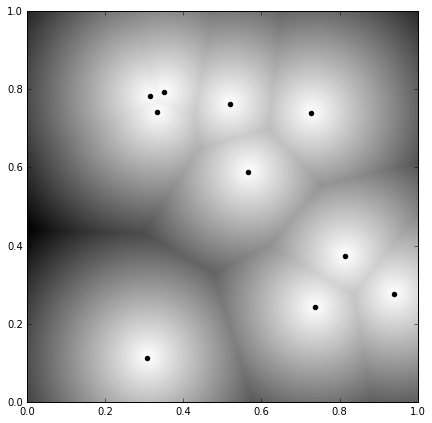

In [43]:
from scipy import stats

# now make a grid
resolution = 250
m = np.linspace(0, 1, resolution)
n = np.linspace(0, 1, resolution)
M, N = np.meshgrid(m,n)
MN = np.dstack((M,N)).reshape(-1,2)

# now find the distasnce to the nearest neighbor of each grid point
dist, nabe = knn(MN,IJ,k=1)

# turn that into an image
dist_img = dist.reshape((resolution,resolution))

plt.figure(figsize=(7,7))
plt.gca().set_aspect('equal')
plt.scatter(I, J, c='black')
# we negate dist_img so that low distances are brighter
plt.imshow(-dist_img,origin='lower',cmap='gray',extent=[0, 1, 0, 1])

In [44]:
# now let's visualize which neighbor is nearest to each point

# reshape the neighbor array into a label image
# a label image has an integer for each pixel identifying its class
# which in this case is the index of the neighboring point in the original
# set of points
label_img = nabe.reshape((resolution,resolution))
label_img

array([[3, 3, 3, ..., 4, 4, 4],
       [3, 3, 3, ..., 4, 4, 4],
       [3, 3, 3, ..., 4, 4, 4],
       ..., 
       [9, 9, 9, ..., 1, 1, 1],
       [9, 9, 9, ..., 1, 1, 1],
       [9, 9, 9, ..., 1, 1, 1]])

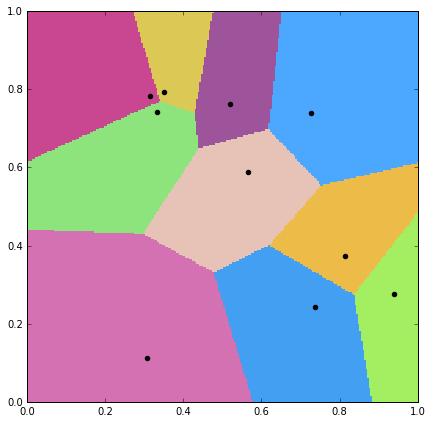

In [45]:
from skimage.color import label2rgb

# now randomly pick colors for each value in the label image
colors = np.random.uniform(low=0.25,size=(np.max(label_img)+1,3))

plt.figure(figsize=(7,7))
plt.gca().set_aspect('equal')
plt.scatter(I, J, c='black')
# label2rgb turns a label image into an rgb image given colors
plt.imshow(label2rgb(label_img,colors=colors),interpolation='nearest',origin='lower',extent=[0, 1, 0, 1])

This is a Voronoi diagram

https://en.wikipedia.org/wiki/Voronoi_diagram